In [10]:
import os
import numpy as np
np.set_printoptions(formatter={"float": lambda x: f"{x:5.5f}"})

import torch

from model.AnomalyTransformer import AnomalyTransformer
from sklearn.preprocessing import StandardScaler

In [11]:
model = AnomalyTransformer(win_size=100, enc_in=18, c_out=18, e_layers=3)
model.load_state_dict(torch.load("/home/joono/AnomalyEnvDetector/checkpoints/SmartFarm_checkpoint.pth"))
model = model.eval()

model = model.to("cuda")

temperature = 50

smartfarm_data_path = "/home/joono/AnomalyEnvDetector/dataset/SmartFarm/smartfarm_train.npz"

In [12]:
def preprocess_data(smartfarm_data_path=smartfarm_data_path):
    scaler = StandardScaler()
    data = np.load(smartfarm_data_path)['arr_0'][:, 1:]
    idx = np.load(smartfarm_data_path)['arr_0'][:, 0]
    scaler.fit(data)
    data = scaler.transform(data)
    
    return idx, data

In [13]:
idx, data = preprocess_data()
print(data.shape)

input = torch.tensor(np.float32(data[:100])).to('cuda')
print(input.shape)

output = model(input.unsqueeze(0))

enc_out, _, _, _ = output
enc_out = enc_out.squeeze()
print(enc_out.shape)

enc_out[0], data[0]

(503695, 18)
torch.Size([100, 18])
torch.Size([100, 18])


(tensor([ 0.2879,  0.5264,  0.4225, -0.5300, -0.1421, -0.5571,  0.0297,  0.0740,
         -0.3067,  0.1316, -0.8575, -0.1118,  0.3849,  0.2940,  1.0530,  0.7505,
          0.6937,  1.0376], device='cuda:0', grad_fn=<SelectBackward0>),
 array([0.06172, 0.38907, -0.04748, -0.07665, -0.11270, -0.67968, -0.20449,
        -0.30440, -0.14143, -0.22020, -1.35047, -0.15275, 0.16478,
        -0.09184, -0.34013, 0.51301, 0.34075, -0.33697]))

In [14]:
idx, data = preprocess_data()
print(data.shape)

(503695, 18)


In [15]:
data_origin = np.load(smartfarm_data_path)['arr_0'][:, 1:]
print(data.shape)

(503695, 18)


In [29]:
data_shift = np.zeros((503696, 18))
data_shift[1:] = data # 한 칸 미룬 data 를 copy.

difference =  (data_shift[:-1] - data)[1:] # 차분 계산
diff_energy = np.sum(np.abs(difference), axis=1)
print(diff_energy.shape)

(503694,)


In [17]:
import matplotlib.pyplot as plt

In [18]:
idx[179089]

649.0

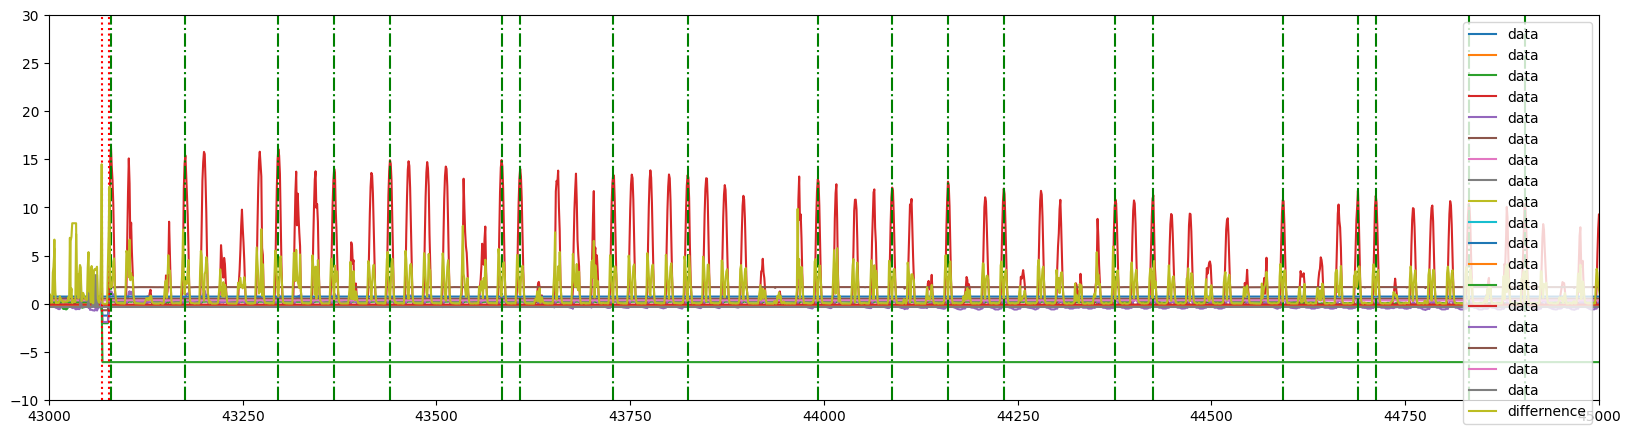

In [49]:
column = 0
seq = 35

# abnormal_pts = np.where(diff_energy > 10.0)
# print(abnormal_pts, len(abnormal_pts[0]))

# point = abnormal_pts[0][seq]
# print(point)

pred = np.load("pred.npy")

plt.figure(figsize=(20, 5))
plt.xlim(43000, 45000)
plt.ylim(-10, 30)


plt.plot(data, label="data")

for model_pred in np.where(pred == 1)[0]:
    plt.axvline(x=model_pred, color='green', linestyle='-.')    

for pt in np.where(diff_energy > 10.0)[0]:
    plt.axvline(x=pt, color='red', linestyle=':')
    
plt.plot(diff_energy, label="differnence")
    
plt.legend(loc='upper right')

In [114]:
data[31153-2:31153+10, 0]

array([1.32592, 1.20723, 1.16962, -0.93572, -1.23611, -1.23611, -1.23611,
       1.08812, 1.08404, 1.10682, 1.15393, 1.22818])

In [146]:
for id in idx:
    print(id)

6552.0
6553.0
6554.0
6555.0
6556.0
6557.0
6558.0
6559.0
6560.0
6561.0
6562.0
6563.0
6564.0
6565.0
6566.0
6567.0
6568.0
6576.0
6577.0
6578.0
6579.0
6580.0
6581.0
6582.0
6583.0
6584.0
6585.0
6586.0
6587.0
6588.0
6589.0
6590.0
6591.0
6592.0
6600.0
6601.0
6602.0
6603.0
6604.0
6605.0
6606.0
6607.0
6608.0
6609.0
6610.0
6611.0
6612.0
6613.0
6614.0
6615.0
6616.0
6624.0
6625.0
6626.0
6627.0
6628.0
6629.0
6630.0
6631.0
6632.0
6633.0
6634.0
6635.0
6636.0
6637.0
6638.0
6639.0
6640.0
6648.0
6649.0
6650.0
6651.0
6652.0
6653.0
6654.0
6655.0
6656.0
6657.0
6658.0
6659.0
6660.0
6661.0
6662.0
6663.0
6664.0
6672.0
6673.0
6674.0
6675.0
6676.0
6677.0
6678.0
6679.0
6696.0
6697.0
6698.0
6699.0
6700.0
6701.0
6702.0
6703.0
6720.0
6721.0
6722.0
6723.0
6724.0
6725.0
6726.0
6727.0
6744.0
6745.0
6746.0
6747.0
6748.0
6749.0
6750.0
6751.0
6768.0
6769.0
6770.0
6771.0
6772.0
6773.0
6774.0
6775.0
6792.0
6793.0
6794.0
6795.0
6796.0
6797.0
6798.0
6799.0
6816.0
6817.0
6818.0
6819.0
6820.0
6821.0
6822.0
6840.0
6841.0
6842.0

In [149]:
diff_idx = idx[:-1] - idx[1:]

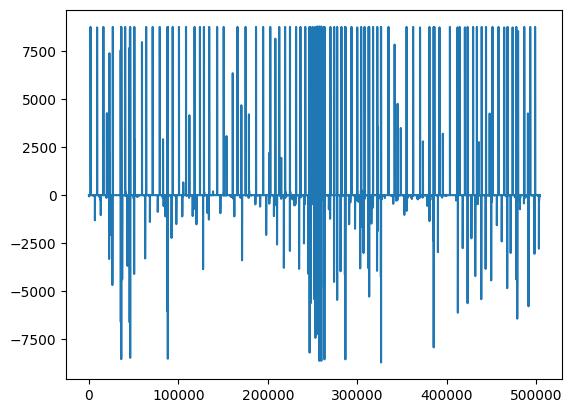

In [150]:
plt.plot(diff_idx)

In [154]:
np.where(np.abs(diff_idx) > 1)

(array([    16,     33,     50, ..., 503466, 503588, 503681]),)

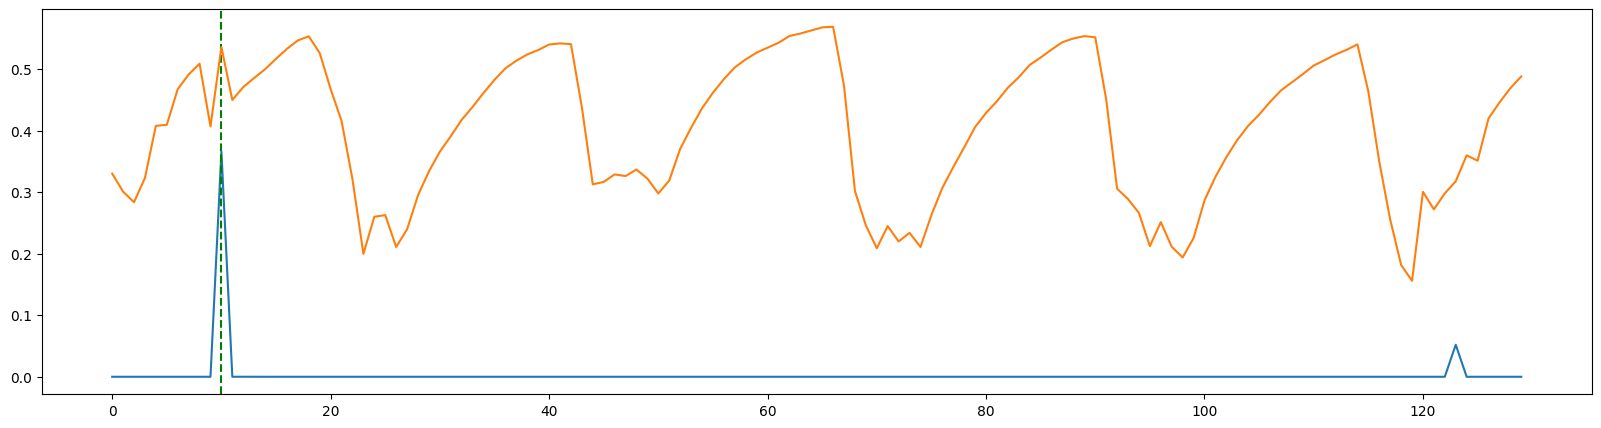

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tqdm import tqdm

start, end = 10170, 10300

pred = np.load("pred.npy")
test_energy = np.load("test_energy.npy")
origin_data = pd.read_csv("/home/joono/AnomalyEnvDetector/dataset/SmartFarm/SmartFarm_tomato_env_sensor_data.csv")

plt.figure(figsize=(20, 5))
plt.plot(test_energy[start:end])

# pos = 0
# for facid in origin_data["facilityId"].unique():
#     facid_data = origin_data[origin_data["facilityId"] == facid]
#     if len(facid_data) > 1000:
#         pos += len(facid_data)
#         plt.axvline(x=pos, color='r', linestyle="--")

for pr in np.where(pred == 1)[0]:
    if start < pr < end:
        plt.axvline(x=pr-start, color='g', linestyle="--")
    
plt.plot(origin_data["CI"][start:end].to_numpy() / 1000)

In [ ]:
pred = np.load("pred.npy")